# Class 5 - 8.4.18

# Scientific Python

## Introduction

![The scientific Python stack](scientific_python.jpg)

The onion-like scientific stack of Python is composed of the most important packages used in the Python scientific world. Here's a quick overview of the most important names in the stack, before we dive in deep:
1. IPython: A REPL, much like the command window in MATLAB. Lets you write Python on the fly, debug and check the performance of your code, and much (much!) more.
2. NumPy: Standard implementation of multi-dimensional arrays in Python. 
3. Jupyter: Notebooks aimed at data exploration. Write code and see its output immediately, with useful Markdown annotations to accompany it - just like this notebook!
4. SciPy: Implements advanced algorithms widely used in scientific programming. Advanced linear algebra, data structures, curve fitting, signal processing, modeling and more.
5. Matplotlib: Visualizations of your data in Python with MATLAB-like interface.
6. Pandas: Tabular data manipulation.

This scientific stack is one of the main reasons that empowered Python in recent years to the prominent spot it has today.

Throughout the course you will become familiar with all of the mentioned tools, and more.

## NumPy

NumPy is the de-facto implementation of arrays in Python. They're very similar to MATLAB arrays (and to other implementations in other programming languages), which will hopefully make us feel comfortable with this module.

>[This](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html) page contains a thorough comparison of similar functions in MATLAB and numpy. If you want to use MATLAB's `find` function and can't seem to find a counterpart in numpy (it's `nonzero`, BTW), or if you wish to see how do different arithmetic functions compare between the two, that page can be of great assistance.

In [1]:
import numpy as np  # standard alias for numpy

In [2]:
l = [1, 2, 3]
arr = np.array(l)  # obviously equal to np.array([1, 2, 3])
arr

array([1, 2, 3])

In [3]:
# Check the dimensionality of the array:
print("Shape: ", arr.shape)
print("NDim: ", arr.ndim)
# But...
a = np.array(1)  # wrong instatiation! Don't use it, instead write np.array([1])
print("Shape: ", a.shape)
print("NDim: ", a.ndim)


Shape:  (3,)
NDim:  1
Shape:  ()
NDim:  0


We've instantiated an array by calling the `np.array()` function on an iterable. This will create a one-dimensional numpy array, or _vector_. This is the first _important_ difference from MATLAB. In MATLAB, all arrays are by default n-dimensional. If you write:
```matlab
a = 1
a(:, :, :, :, :, 1) = 2
```
then you just received a 6-dimensional array. Numpy doesn't allow that. The dimensions of an array are generally the dimensions it had when it was created. You can always use `reshape`, like MATLAB, to define the exact number of dimensions you wish to have. You can also use `np.newaxis` to add an axis, as we'll see below.

The second difference is the idea of vectors.

In [4]:
print(f"The number of dimensions is {arr.ndim}.")
print(f"The shape is {arr.shape}.")

The number of dimensions is 1.
The shape is (3,).


As you see, `ndim` returns the number of dimensions. The `shape` is returned as a tuple, the length of which is the number of dimensions, while the values represent the number of elements in each dimensions. `shape` is very similar to the `size()` function of MATLAB.

Creating arrays with more than one dimension might look odd at a first glance:

In [5]:
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
arr_2d

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
print(f"The number of dimensions is {arr_2d.ndim}.")
print(f"The shape is {arr_2d.shape}.")
print(f"The len of the array is {len(arr_2d)} - which corresponds to the value of the 0th dimension.")

The number of dimensions is 2.
The shape is (2, 3).
The len of the array is 2 - which corresponds to the value of the 0th dimension.


As we see, each list was considered a single "row" (dimension number 0) in the final array, very much like MATLAB, although the syntax can be confusing at first. Here's another slightly confusing example:

In [7]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [8]:
c.shape

(2, 2, 1)

### Getting help

Numpy has a ton of features, and to get around it we can use `lookfor` and the `?` sign, besides the official reference on the internet:

In [9]:
np.lookfor("Create array")

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArr

In [10]:
np.con*?

### Creating arrays

In [11]:
np.arange(10)  # similar to MATLAB's 0:9 (and to Python's range())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.arange(start=1, stop=8, step=3)  # MATLAB's 1:3:8

array([1, 4, 7])

In [13]:
np.zeros((2, 3))  # notice that the shape is a tuple

array([[0., 0., 0.],
       [0., 0., 0.]])

In [14]:
np.zeros_like(arr_2d)

array([[0, 0, 0],
       [0, 0, 0]])

In [15]:
np.ones((1, 4), dtype='int64')  # 2-d array with the dtype argument

array([[1, 1, 1, 1]], dtype=int64)

In [16]:
np.full((4, 2), 1e6)

array([[1000000., 1000000.],
       [1000000., 1000000.],
       [1000000., 1000000.],
       [1000000., 1000000.]])

In [17]:
np.linspace(0, 10, 3)  # start, stop, number of points (endpoint as a keyword argument)

array([ 0.,  5., 10.])

In [18]:
np.linspace(0, 10, 3, endpoint=False, dtype=np.float32)

array([0.       , 3.3333333, 6.6666665], dtype=float32)

In [19]:
np.eye(3, dtype='uint8')

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [20]:
np.diag([19, 20])

array([[19,  0],
       [ 0, 20]])

In [21]:
# Some more interesting features
np.array([True, False, False])

array([ True, False, False])

In [22]:
np.array([1+2j]).dtype

dtype('complex128')

In [23]:
np.array(['a', 'bc', 'd', 'e'])  # <U2 are strings containing maximum 2 unicode letters
# No such thing as a cell array, arrays can contain strings.

array(['a', 'bc', 'd', 'e'], dtype='<U2')

In [24]:
# Arrays can be heterogeneous, although usually this is discouraged. 
# To make an hetetogeneous array, you have to specify its data type as "object", or "np.object":
np.array([1, 'b', True, {'b': 1}], dtype=object)

array([1, 'b', True, {'b': 1}], dtype=object)

The last few examples showed us that numpy arrays are a superset of MATLAB's matrices, as they also contain the cell array functionality within them.

When multiplying numpy arrays, multiplication is done cell-by-cell (elementwise), rather than by the rules of linear algebra. 

You can still multiply vectors and matrices using one of two options:
* The `@` operator (preferred): `arr1 @ arr2`
* `arr1.dot(arr2)`

Just remember that the default behavior is different than MATLAB's.

Also, numpy does contain a matrix-like array - `np.matrix('1 2; 3 4')` - which behaves like a linear algebra 2D matrix, but its use is discouraged.

### Difference between numpy arrays and lists

You might have asked yourselves by this point what's the difference between lists and numpy arrays. In other words, if Python already has an array-like data structure, why does it need another one?

Lists are truly amazing, but their flexibility comes at a cost. You won't notice it when you're writing some short script, but when you start working with real datasets you notice that their performance is _lacking_.

Naive iteration over lists is good enough when the lists contain up to a few thousands of elements, but somewhere after this invisible threshold you will start to notice the runtimes of your app.

#### Why are lists slower?

Lists are slower due to their implementation. Because a list has to be heterogeneous, a list is actually an object containing references to other objects, which are the elements of the data contained in the list. This nesting can go on even deeper, since elements of lists can be other lists, or other complex data types.

Iterating over such a complicated objects contains a lot of "overhead", i.e. time the interpreter tries to figure out what is it actually facing - is this current value an integer? A float? A dictionary of tuples?

![Numpy arrays versus lists](array_vs_list.png)

This is where numpy arrays come into the picture. They require the contained data to be homogeneous (disregarding the "object" datatype), leading to a simpler structure of the underlying implementation: A numpy array is an object with a pointer to a contiguous block of data in the memory.

Numpy forces the elements in its array to be homogeneous, by means of "upcasting":

In [25]:
arr = np.array([1, 2, 3.14, 4])
arr  # upcasted to float, not "object", since it's much slower

array([1.  , 2.  , 3.14, 4.  ])

This homogeneity and contiguity allows numpy to use "vectorized" functions, which are simply functions that can iterate in C code (and SIMD) over the array, as opposed to regular functions which have to use the Python iteration rules.

This means that while in essence the following two pieces of code are identical, the performance gain is due to the loop being done in C rather than in Python (this is the case in MATLAB as well):

In [26]:
%%timeit
python_array = list(range(1000000))
for item in python_array:
    item += 1

118 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%%timeit 
numpy_array = np.arange(1000000)
numpy_array += 1  # inside, a C loop is adding 1 to each item.

# Two orders of magnitude improvement for a pretty small (1M elements) array. 
# This is approximately the size of a 1024x1024 pixel image.

7.81 ms ± 879 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


If you recall the first class, you'll remember that we mentioned how Python code has to be transpiled into C code, which is then compiled to machine code. Numpy arrays take a "shortcut" here, are are quickly compiled to efficient C code without the Python overhead. When using vectorized numpy operations, the loop Python does in the backstage is very similar to a loop that a C programmer would have written by hand.

Another small but significant benefit of numpy arrays is smaller memory footprint:

In [28]:
from sys import getsizeof

python_array = list(range(1000000))
list_size = getsizeof(python_array) / 1e6  # in MB
print(f"Python list size (1M elements, MB): {list_size}")

numpy_array = np.arange(1000000)
numpy_size = numpy_array.nbytes / 1e6
print(f"Numpy array size (1M elements, MB): {numpy_size}")

# Why a million elements take 4 MB? Each element has to weigh 4 bytes, or 32 bits. This means that the
# np.arange() function generates by default int32 values.

Python list size (1M elements, MB): 9.000112
Numpy array size (1M elements, MB): 4.0


### Indexing and slicing

In [29]:
a = np.arange(10)
print(f"a = {a}")
a[0], a[3], a[-2]  # Python indexing is always done with square brackets

a = [0 1 2 3 4 5 6 7 8 9]


(0, 3, 8)

In [30]:
# The beautiful reverse slicing is here as well
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [31]:
arr_2d

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
arr_2d[0, 2]  # first row, third column

3

In [33]:
arr_2d[0, :]  # first row, all columns

array([1, 2, 3])

In [34]:
arr_2d[0]  # first item in the first dimension, and all of its corresponding elemets
# Similar to arr_2d[0, :]

array([1, 2, 3])

In [35]:
a[1::2]

array([1, 3, 5, 7, 9])

In [36]:
a[:2]  # last index isn't included

array([0, 1])

In [37]:
# In Python, slicing creates a view of an object, not a copy:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [38]:
b[0] = 100
b

array([100,   2,   4,   6,   8])

In [39]:
a  # a is also changed!

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])

In [40]:
# Copying is done with .copy()
a_copy = a[::-1].copy()
a_copy

array([  9,   8,   7,   6,   5,   4,   3,   2,   1, 100])

In [41]:
a_copy[1] = 200
a_copy

array([  9, 200,   7,   6,   5,   4,   3,   2,   1, 100])

In [42]:
a_copy  # unchanged

array([  9, 200,   7,   6,   5,   4,   3,   2,   1, 100])

This behavior allows Numpy to save time and memory. It will usually go unnoticed during day-to-day use. Occasionally, however, it can result in ugly bugs which are hard to locate.

In [43]:
a[:3]

array([100,   1,   2])

In [44]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

![Numpy indexing](numpy_indexing.png)

### Aggregation

In [45]:
arr = np.random.random(1000)
sum(arr)  # The native Python sum works on numpy arrays, but its use is discouraged in this context

492.6043817490305

`sum()` is a built in Python function, capable of working on lists and other native Python data structures. Numpy has its own sum functions: You can either write `np.sum(arr)`, or use `arr.sum()`:

In [46]:
%timeit sum(arr)
%timeit np.sum(arr)
%timeit arr.sum()

321 µs ± 103 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.08 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.76 µs ± 847 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Keep in mind that the built-in `sum()` and numpy's `np.sum()` aren't identical. `np.sum()` by default calculates the sum of _all axes_, returning a single number for multi-dimensional arrays.

In MATLAB, this behavior is replicated with `sum(arr(:))`.

Likewise, `min()` and `max()` also have two "competing" versions:

In [47]:
%timeit min(arr)  # Native Python
%timeit np.min(arr)
%timeit arr.min()

123 µs ± 23.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5.84 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.86 µs ± 760 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Calculating the `min` of an array will, again, result in a single number:

In [48]:
arr2 = np.random.random((100, 100, 100))
arr2.min()

5.823232201995765e-07

If you wish to calculate it across an axis, use the `axis` keyword:

In [49]:
# 2D output - axis number 0 was "dropped"
print(arr2.min(axis=0))

print('------')
# 1D output - the two first axes were summed over
print(arr2.max(axis=(0, 1)))

[[1.30105370e-04 1.85247986e-02 5.76981265e-04 ... 2.17054628e-03
  1.74017353e-03 1.71648417e-02]
 [9.74708434e-04 1.42110375e-02 2.27249914e-04 ... 1.84564336e-04
  9.91460849e-03 5.03250994e-04]
 [2.10501609e-03 3.11640007e-03 9.31462323e-03 ... 4.80578692e-03
  2.53371128e-03 1.15754554e-02]
 ...
 [2.64927481e-03 2.05463086e-03 2.03506809e-02 ... 1.71246031e-03
  1.22983732e-02 1.23869152e-02]
 [6.90173657e-04 3.43165101e-03 8.55869758e-03 ... 7.83710115e-04
  1.33042948e-02 7.60761611e-03]
 [3.24140890e-03 7.34097009e-03 9.79868560e-03 ... 3.08316230e-02
  6.87046457e-03 2.45869442e-06]]
------
[0.99996561 0.99998143 0.99979485 0.99995817 0.99992053 0.99996168
 0.9997315  0.99988793 0.99991571 0.9999547  0.99999641 0.99999241
 0.99995579 0.99997798 0.99991344 0.99989906 0.9997946  0.9999751
 0.99997769 0.99986947 0.99986118 0.99993987 0.99994818 0.99999912
 0.99978118 0.999931   0.99992138 0.9997643  0.99999697 0.99999074
 0.99997707 0.9998866  0.99990193 0.99990738 0.99998946 0.9

Many other aggregation functions exist, including:
```
- np.var
- np.std
- np.argmin\argmax
- np.median
- ...
```
Most of them have an object-oriented version, i.e. `arr.var()`, and a procedural version, i.e. `np.var(arr)`.

### Fancy indexing

In Numpy, indexing an array with a different array is called "fancy" indexing. Perhaps confusingly, it creates a copy, not a view.

In [50]:
basic_array = np.arange(10)
basic_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
mask = (basic_array % 2 == 0)
mask

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [52]:
basic_array[mask]  # also basic_array[basic_array % 2 == 0]

array([0, 2, 4, 6, 8])

MATLAB veterans shouldn't be surprised from this feature, but if you haven't seen it before make sure to have a firm grasp on it, as it's a very powerful technique.

In [53]:
basic_array[mask] = 999
basic_array

array([999,   1, 999,   3, 999,   5, 999,   7, 999,   9])

In [54]:
float_array = np.arange(start=0, stop=20, step=1.5)
float_array

array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
       16.5, 18. , 19.5])

In [55]:
float_array[[1, 2, 5, 5, 10]]  # copy, not a view. Meaning that the resulting array is a new
# instance of the original array, independent of it, in a different location in memory.

array([ 1.5,  3. ,  7.5,  7.5, 15. ])

Counting the amount of values that fit our condition can be done as follows:

In [56]:
basic_array = np.arange(10)
count_nonzero_result = np.count_nonzero(basic_array % 2 == 0)
sum_result = np.sum(basic_array % 2 == 0)

print(f"np.count_nonzero result: {count_nonzero_result}")
print(f"np.sum result: {sum_result}")
# In the latter case, True is 1 and False is 0

np.count_nonzero result: 5
np.sum result: 5


If we wish to add more conditions in to the mix, we can use the `&, |, ~, ^` operators (and, or, not, xor):

In [57]:
np.sum((basic_array % 2 == 1) & (basic_array != 3))  # uneven values that are different from 3

4

Note that numpy uses the `&, |, ~, ^` operators for element-by-element comparison, while the reserved `and` and `or` keywords evaluate the entire object:

In [58]:
np.sum((basic_array % 2 == 1) and (basic_array != 3))   # doesn't work, "and" isn't used this way here

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Sorting

Again we face a condition in which Python has its own `sort` functions, but numpy's `np.sort()` are much better suited for arrays. We can either sort in-place, or have a new object back:

In [59]:
# Return a new object:
arr = np.array([ 3, 4, 1, 8, 10, 2, 4])
print(np.sort(arr))

# Sort in-place:
arr.sort()
print(arr)

[ 1  2  3  4  4  8 10]
[ 1  2  3  4  4  8 10]


The default implementation is a _quicksort_, but other sorting algorithms can be found as well.

In [60]:
# np.argsort will return the indices of the sorted array:
arr = np.array([ 3, 4, 1, 8, 10, 2, 4])
print("Sorted indices: {}".format(np.argsort(arr)))

# Usage is as follows:
arr[np.argsort(arr)]

Sorted indices: [2 5 0 1 6 3 4]


array([ 1,  2,  3,  4,  4,  8, 10])

### Concatenation

Concatenation (and splitting) in numpy works as follows:

In [61]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])  # concatenates along the first axis

array([1, 2, 3, 3, 2, 1])

In [62]:
# Concatenate more than two arrays
z = [99, 99, 99]
np.concatenate([x, y, z])  # notice how the function argument is an iterable!

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

In [63]:
# 2D - along the last axis
twod_1 = np.array([[0, 1, 2],
                   [3, 4, 5]])
twod_2 = np.array([[6, 7, 8],
                   [9, 10, 11]])
np.concatenate((twod_1, twod_2), axis=-1)

array([[ 0,  1,  2,  6,  7,  8],
       [ 3,  4,  5,  9, 10, 11]])

In [64]:
# np.vstack and np.hstack are also an option
sim1 = np.array([0, 1, 2])
sim2 = np.array([[30, 40, 50],
                 [60, 70, 80]])
np.vstack((sim1, sim2))

array([[ 0,  1,  2],
       [30, 40, 50],
       [60, 70, 80]])

Splitting up arrays is also quite easy:

In [65]:
arr = np.arange(16).reshape((4, 4))  # see the tuple? Shapes of arrays always come in tuples
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [66]:
upper, lower = np.split(arr, [3])  # splits at the third line (of the first axis, by default)
print(upper)
print('---')
print(lower)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
---
[[12 13 14 15]]


### Exercise

#### a. Familiarization:

Create two random 3D arrays, at least 3x3x3 in size. The first should have random integers between 0 and 100, while the second should contain floating points numbers drawn from the normal distribution, with mean -1 and standard deviation of 2 

1. What are the default datatypes of integer and floating-point arrays in numpy?

2. Center the distribution of the first integer array around 0, with values between -1 and 1.

3. Caclulate their mean, standard deviation along the last axis, and sum along the second axis. Remember that arrays are, like everything in Python, objects.


#### b. _Iteration over an array:_ 

Find and return the indices of the two random arrays only where _both elements_ comply with -0.5 <= X <= 0.5. Do so in at least two distinct ways. These can include elementwise iteration, masked-arrays, and more.

Time the execution of the script using the iPython `%%timeit` magic if you have this tool near at hand.

#### c. _Broadcasting:_
1. Create a vector with length 100, filled with ones, and a 2D zero-filled array with a its last dimension with size of 100. 
2. Using `np.tile`, add the vector and the array.
3. Did you have to use `np.tile` in this case? What feature of numpy allows this?
4. What happens to the non-tiled addition when the first dimension of the matrix is 100? Why?
5. Bonus: How can one add the matrix (in its new shape) and vector without np.tile()?

### Exercise solutions below...

In [67]:
# a
# 1
low = 0
high = 100
arr1 = np.random.randint(low=low, high=high, size=(10, 10, 10))  # dtype is np.int32
arr2 = np.random.randn(10, 10, 10) * 2 - 1  # dtype is np.float64

# 2
middle = (high - low) / 2
arr1 = (arr1 - middle) / middle

# 3
print("arr1 (integers) stats:")
print(f"Mean: {arr1.mean()},\nSTD: {arr1.std(axis=-1)},\nSum: {arr1.sum(axis=1)}")
print("arr2 (normal distribution) stats:")
print(f"Mean: {arr2.mean()},\nSTD: {arr2.std(axis=-1)},\nSum: {arr2.sum(axis=1)}")

arr1 (integers) stats:
Mean: -0.022420000000000002,
STD: [[0.46527841 0.58366086 0.4970674  0.52520472 0.60564346 0.63283805
  0.46085139 0.4209513  0.4701872  0.38631076]
 [0.43277708 0.36011665 0.54919578 0.53052427 0.56936807 0.59547964
  0.67530438 0.49422262 0.59702261 0.50169712]
 [0.61430937 0.63617608 0.50404762 0.29719354 0.52853004 0.59573148
  0.35097578 0.55072679 0.4445942  0.70312446]
 [0.50732238 0.60033657 0.59707621 0.61442656 0.5200923  0.54035544
  0.6159513  0.34816663 0.44210406 0.44297178]
 [0.6061155  0.57822141 0.44680645 0.45090576 0.41950447 0.66157388
  0.56838367 0.47866899 0.43709953 0.30857738]
 [0.46726866 0.58472558 0.5181853  0.65363292 0.62387178 0.45847137
  0.62560371 0.5420738  0.63403785 0.4835866 ]
 [0.63245869 0.63586477 0.44535379 0.4886553  0.67346566 0.59189188
  0.65740399 0.67680426 0.63917447 0.49990399]
 [0.62806369 0.47633602 0.54065146 0.47453556 0.56703086 0.64226163
  0.37139736 0.57250677 0.46189176 0.5343744 ]
 [0.51646878 0.36351616

In [68]:
# %%timeit
# b
# 1 - elementwise
result = []
for idx, (item1, item2) in enumerate(zip(arr1.flat, arr2.flat)):
    if (-0.5 <= item1 <= 0.5) and (-0.5 <= item2 <= 0.5):
        result.append(idx)
result

[0,
 41,
 46,
 47,
 67,
 84,
 100,
 111,
 114,
 116,
 138,
 147,
 149,
 173,
 180,
 182,
 193,
 228,
 233,
 236,
 237,
 242,
 249,
 257,
 287,
 295,
 307,
 310,
 347,
 349,
 361,
 364,
 372,
 373,
 374,
 390,
 394,
 402,
 403,
 416,
 418,
 440,
 452,
 454,
 471,
 480,
 496,
 519,
 522,
 526,
 548,
 550,
 557,
 560,
 561,
 562,
 607,
 620,
 634,
 635,
 690,
 699,
 706,
 716,
 720,
 726,
 788,
 790,
 804,
 824,
 836,
 841,
 849,
 862,
 888,
 897,
 900,
 904,
 913,
 919,
 920,
 923,
 926,
 997]

In [69]:
# %%timeit
# b
# 2 - masked arrays createed by np.ravel(), np.where()
mask1 = ((-0.5 <= arr1.ravel()) & (arr1.ravel() <= 0.5))
mask2 = ((-0.5 <= arr2.ravel()) & (arr2.ravel() <= 0.5))
both_positive = np.logical_and(mask1, mask2)
result = np.where(both_positive)
result

(array([  0,  41,  46,  47,  67,  84, 100, 111, 114, 116, 138, 147, 149,
        173, 180, 182, 193, 228, 233, 236, 237, 242, 249, 257, 287, 295,
        307, 310, 347, 349, 361, 364, 372, 373, 374, 390, 394, 402, 403,
        416, 418, 440, 452, 454, 471, 480, 496, 519, 522, 526, 548, 550,
        557, 560, 561, 562, 607, 620, 634, 635, 690, 699, 706, 716, 720,
        726, 788, 790, 804, 824, 836, 841, 849, 862, 888, 897, 900, 904,
        913, 919, 920, 923, 926, 997], dtype=int64),)

As you can tell, the second solution is far more efficient than the first, and after a few read code blocks, the syntax presented there can be at least as clear as the one in the first solution.

In [70]:
# c
# 1
vec = np.ones(100)
mat = np.zeros((10, 100))

# 2
tiled_vec = np.tile(vec, (10, 1))  # transpose is necessary
ans_tiled = mat + tiled_vec

# 3
ans_simple = mat + vec  # It's called array broadcasting

# 4
mat_transposed = mat.T
print(mat_transposed.shape)
# ans_trans = mat_transposed + vec  # fails because broadcasting is done over the last dimension

# 5 - np.newaxis is the answer - very perfomant
ans_newaxis = mat_transposed + vec[:, np.newaxis]

(100, 10)


# Scientific Python and Pandas

Last week we discussed numpy, which in many ways is the cornerstone of the scientific ecosystem of Python. Besides numpy, there are a few additional libraries which every scientific Python user should know. The "epitome" will come in the form of pandas, which will be our main point of interest in the coming lessons.

## Matplotlib

The most widely-used plotting library in the Python ecosystem is Matplotlib. It allows for _very_ complicated data visualizations, and has two parallel implementations - a procedural one, and an object-oriented one. 

The procedural one resembles the MATLAB plotting interface very much, allowing for a very quick transition for MATLAB veterans. 

Having said that, and even though _old habits die hard,_ it's important to stress the point that the object-oriented interface is better in the long run, since it complies with more online examples and allows for easier plot manipulations.

In [71]:
import matplotlib.pyplot as plt  # traditional import
import numpy as np
%matplotlib inline
# for notebooks, not needed in code written somewhere else.

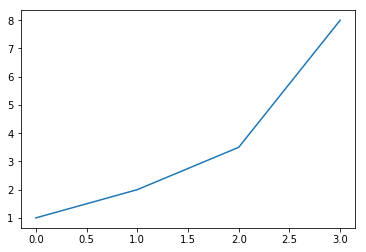

In [72]:
# Procedural implementation - MATLAB style
plt.plot([1, 2, 3.5, 8])

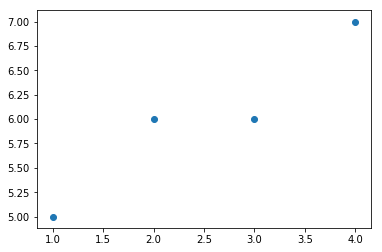

In [73]:
plt.scatter([1, 2, 3, 4], [5, 6, 6, 7])

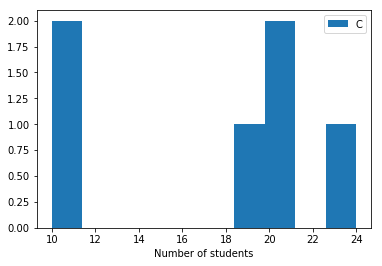

In [74]:
plt.hist(np.array([10, 11, 19, 20, 20, 24]))
plt.xlabel('Number of students')
plt.legend('C')

But - as we said, this implementation is less ergonomic in the long run. You're better off with the object-oriented one.

Text(0.5,0,'Time [seconds]')

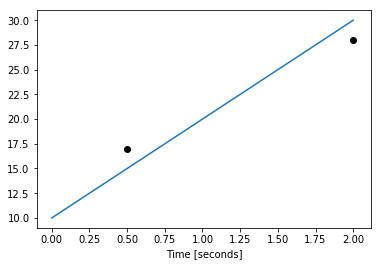

In [75]:
# OO implementation
fig = plt.figure()  # a figure is the entire "screen", which can contain many plots

ax = fig.add_subplot(111)  # axis is the data itself. Again, several lines can be contained in the same axis
ax.plot([10, 20, 30])
ax.scatter([0.5, 2], [17, 28], color='k')
ax.set_xlabel('Time [seconds]')  # the two objects inside the axis object have the same scale

In [76]:
# plots can be saved
fig.savefig("scattered.pdf", dpi=300, transparent=True)

Matplotlib is used in conjuction with numpy to visualize arrays:

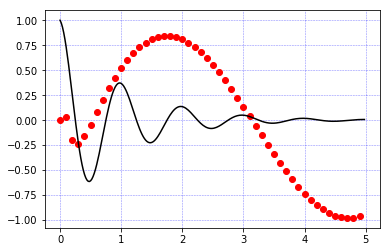

In [77]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
def g(t):
    return np.sin(t) * np.cos(1/(t+0.1))

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.plot(t1, g(t1), 'ro', t2, f(t2), 'k')  # two plots in the same call
ax1.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 2., 5., 2., 2., 0., 2., 0., 0., 0.],
        [1., 0., 3., 2., 3., 5., 1., 1., 0., 0.],
        [0., 3., 2., 7., 1., 3., 2., 2., 0., 0.],
        [2., 2., 4., 7., 2., 1., 4., 4., 0., 0.],
        [0., 1., 2., 2., 2., 3., 0., 0., 1., 1.],
        [0., 0., 0., 2., 1., 2., 0., 2., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]]),
 array([-3.80748389, -3.14946377, -2.49144365, -1.83342353, -1.17540341,
        -0.51738329,  0.14063683,  0.79865695,  1.45667708,  2.1146972 ,
         2.77271732]),
 array([-1.90500868, -1.45071089, -0.99641311, -0.54211532, -0.08781754,
         0.36648025,  0.82077803,  1.27507582,  1.7293736 ,  2.18367139,
         2.63796917]),
 <matplotlib.image.AxesImage at 0x1a63950aef0>)

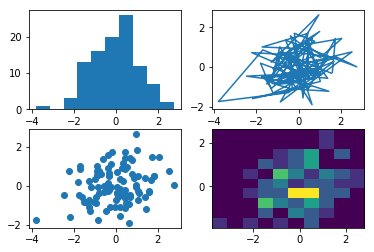

In [78]:
data = np.random.randn(2, 100)  # random numbers from normal distribution

fig, axs = plt.subplots(2, 2)  # still OO notation, perhaps more convenient
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

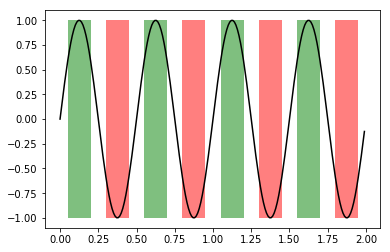

In [79]:
fig, ax = plt.subplots()
x = np.arange(0.0, 2, 0.01)
y = np.sin(4*np.pi*x)
ax.plot(x, y, color='black')

ax.fill_between(x, -1, 1, where=y > 0.5, facecolor='green', alpha=0.5)
ax.fill_between(x, -1, 1, where=y < -0.5, facecolor='red', alpha=0.5)

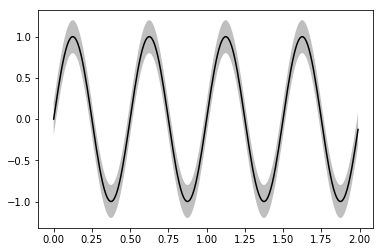

In [80]:
fig, ax = plt.subplots()
x = np.arange(0.0, 2, 0.01)
y = np.sin(4 * np.pi * x)
y_top = y + 0.2
y_bot = y - 0.2
ax.plot(x, y, color='black')

ax.fill_between(x, y_bot, y_top, facecolor='gray', alpha=0.5)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


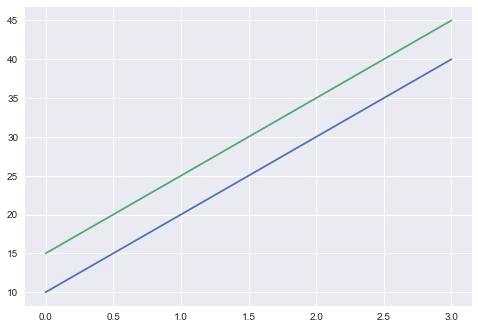

In [81]:
# Styles - a world of possibilities
print(plt.style.available)
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot([10, 20, 30, 40])
ax.plot([15, 25, 35, 45])

## Other Libraries

### SciPy

SciPy is a large library consisting of many smaller modules, each targeting a single field of scientific computing.

Available modules include `scipy.stats`, `scipy.linalg`, `scipy.fftpack`, `scipy.signal` and many more.

Because of its extremely wide scope of available use-cases, we won't go through all of them. All you need to do is to remember that many functions that you're used to find in different MATLAB toolboxes are located somewhere in SciPy. 

Below you'll find a few particularly interesting use-cases.

In [82]:
# .mat files input\output
from scipy import io as spio

a = np.ones((3, 3))

spio.savemat('file.mat', {'a': a})  # savemat expects a dictionary

data = spio.loadmat('file.mat')

In [83]:
# Linear algebra
from scipy import linalg

arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)  # SVD

arr = np.array([[1, 2],
                [3, 4]])

iarr = linalg.inv(arr)  # Inverse of square matrix


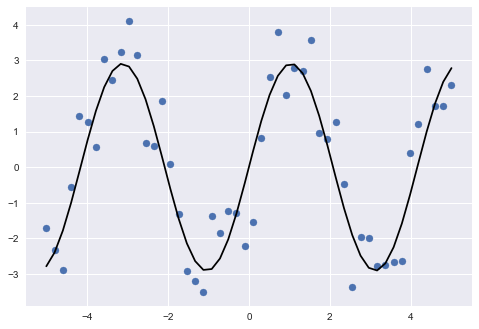

In [84]:
# Curve fitting
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

# Create noisy data
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
ax.plot(x_data, test_func(x_data, params[0], params[1]), 'k')

Ttest_indResult(statistic=-1.0164884577931492, pvalue=0.31166860633366594)

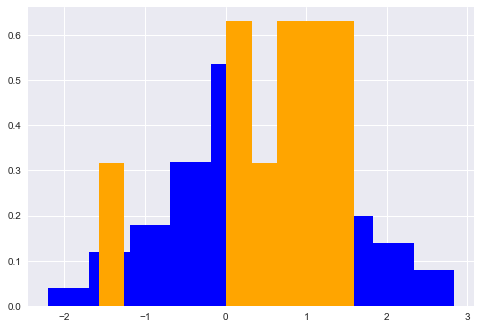

In [85]:
# Statistics
from scipy import stats

a = np.random.normal(loc=0, scale=1, size=100)
b = np.random.normal(loc=1, scale=1, size=10)
fig, ax = plt.subplots()
ax.hist(a, color='b', normed=True)
ax.hist(b, color='orange', normed=True)
stats.ttest_ind(a, b) 

### iPython

iPython is the REPL in which this text is written in. As stated, it's the most popular "command window" of Python. Let's examine some of its features, accessible by the `%` _magic_ operator:

#### `%%timeit` - micro-benchmarking

In [86]:
def loop_and_sum(lst):
    """ Loop and some a list """
    sum = 0
    for item in lst:
        sum += item

In [87]:
%timeit loop_and_sum([1, 2, 3, 4, 5])

976 ns ± 134 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [88]:
%timeit loop_and_sum(list(range(10000)))

2.05 ms ± 852 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### `%%prun` - benchmark each function line

In [89]:
%%prun
data1 = np.arange(500000)
data2 = np.zeros(500000)
ans = data1 + data2 + data1*data2
loop_and_sum(list(np.arange(10000)))
data1 @ data2

### `%run` - run external script

In [90]:
%run mock/a.py

Wow


#### `%matplotlib [notebook\inline]` - run matplotlib inside the notebook easily

#### `%reset` - resets the namespace

#### `%%latex` - render the cell as $\LaTeX$

In [91]:
%%latex
$$a^2 + b^2 = c^2$$

$$e^{i\pi} + 1 = 0$$

<IPython.core.display.Latex object>

### Scikit-Image

Scikit-Image is one of the main image processing libraries in Python. We'll look at it in greater interest later in the semester, but for now let's examine some of its algorithms:

C:\Users\Hagai\Miniconda3\envs\general\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


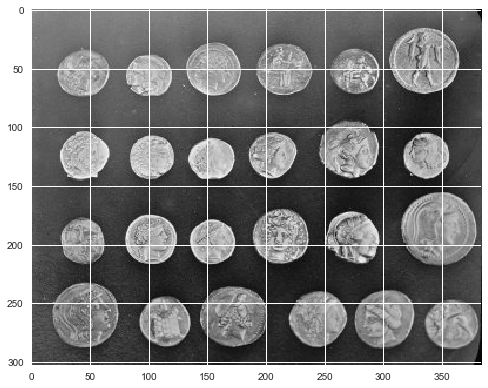

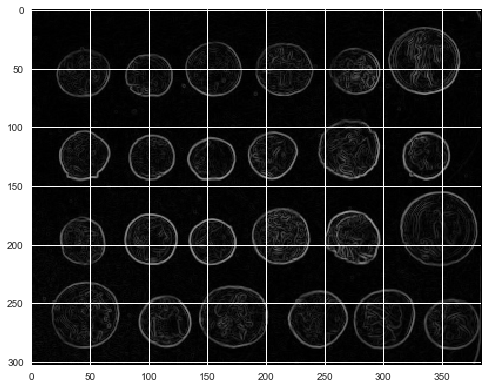

In [92]:
# Edge detection
from skimage import data, io, filters

image = data.coins()
io.imshow(image)
edges = filters.sobel(image)
plt.figure()
io.imshow(edges)

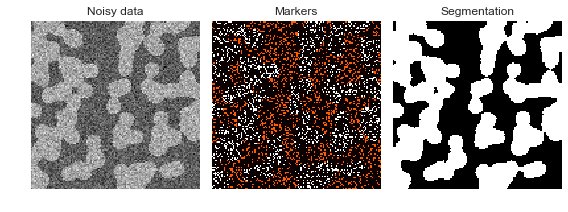

In [93]:
# Segmentation using random walker algorithm
from skimage.segmentation import random_walker
from skimage.data import binary_blobs
import skimage

# Generate noisy synthetic data
data1 = skimage.img_as_float(binary_blobs(length=128, seed=1))
data1 += 0.35 * np.random.randn(*data1.shape)
markers = np.zeros(data1.shape, dtype=np.uint)
markers[data1 < -0.3] = 1
markers[data1 > 1.3] = 2

# Run random walker algorithm
labels = random_walker(data1, markers, beta=10, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2),
                                    sharex=True, sharey=True)
ax1.imshow(data1, cmap='gray', interpolation='nearest')
ax1.axis('off')
ax1.set_adjustable('box-forced')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='hot', interpolation='nearest')
ax2.axis('off')
ax2.set_adjustable('box-forced')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_adjustable('box-forced')
ax3.set_title('Segmentation')

fig.tight_layout()

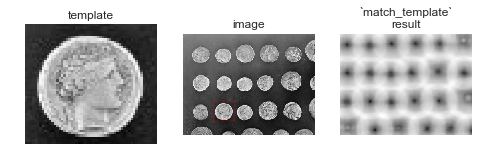

In [94]:
# Template matching

from skimage.feature import match_template


image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

### Exercise

Perform these exercises using the object-oriented interface of Matplotlib.

1. Create 1000 normally-distributed points. Histogram them. Overlay the histogram with a dashed line showing the theoretical normal distribution we would expect from the data.
2. Create a (1000, 3)-shaped matrix of uniformly distributed points between [0, 1). Create a scatter plot with the first two columns as the $x$ and $y$ columns, while the third should control the size of the created point.

3. Using `np.random.choice`, "roll a die" 100 times. Create a 6x1 figure panel with a shared $x$-axis containing values between 0 and 10000 (exclusive). The first panel should show a vector with a value of 1 everywhere the die roll came out as 1, and 0 elsewhere. The second panel should show a vector with a value of 1 everywhere the die roll came out as 2, and 0 elsewhere, and so on. Create a title for the entire figure. The $y$-axis of each panel should indicate the value this plot refers to.

### Exercise solutions below...

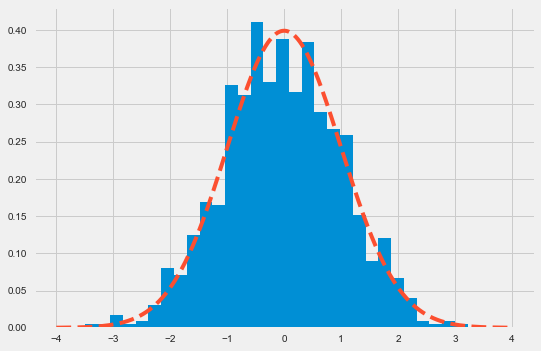

In [95]:
# 1
plt.style.use('fivethirtyeight')
import scipy.stats

data = np.random.randn(1000)
x_axis = np.arange(-4, 4, 0.001)

fig, ax = plt.subplots()
ax.hist(data, bins=30, density=True)  # the "density" keyword simplifies the scaling
ax.plot(x_axis, scipy.stats.norm.pdf(x_axis, 0, 1), '--')

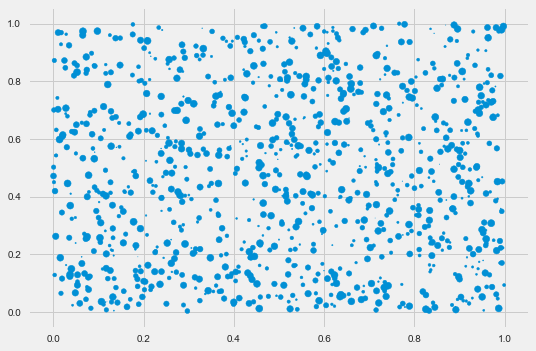

In [96]:
# 2
data = np.random.random((1000, 3))
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=data[:, 2]*50)

Text(0.01,0.5,'Roll value')

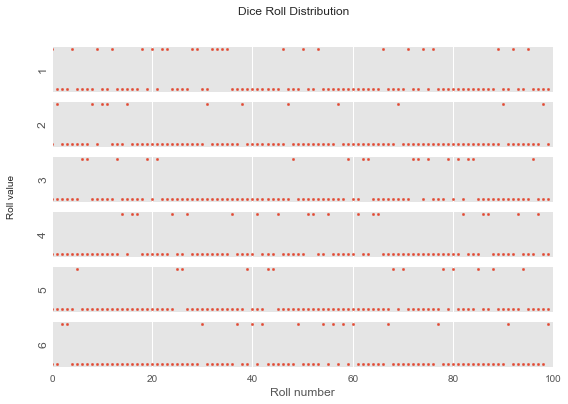

In [97]:
# 3
plt.style.use('ggplot')
die = np.arange(1, 7)
num = 100
rolls = np.random.choice(die, num)
fig, ax = plt.subplots(6, 1, sharex=True)
for roll, axis in enumerate(ax, 1):
    axis.scatter(np.arange(num), rolls==roll, s=5)  # notice how we plot a boolean vector
    axis.set_ylabel(roll)
    axis.yaxis.set_ticks([])

axis.set_xlim([0, num])
axis.set_xlabel('Roll number')
fig.suptitle('Dice Roll Distribution')
fig.text(0.01, 0.5, 'Roll value', ha='center', va='center', rotation='vertical')

## Pandas - Data Analysis in Python

A large part of what makes Python so popular nowadays is Pandas, or the "Python data analysis library".

Pandas has been around since 2008, and while in itself it's built on the solid foundations of numpy, it introduced a vast array of important features that can hardly be found anywhere _outside_ of the Python ecosystem.

The general priniciple in working with Pandas is to first look up in its immense codebase, or somewhere online, an existing function that does exactly what you're looking for, and if you can't - only then should you implement it youself.

Much of the discussion below is taken from the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), by Jake VanderPlas. Be sure to check it out if you need further help with one of the topics.

## The need for pandas

With only _clean_ data in the world, pandas wouldn't be as necessary. By clean we mean that all of our data was sampled properly, without any missing data points. We also mean that the data is homogeneous, i.e. of a single type (floats, ints), and one-dimensional. 

An example of this simple data might be an electrophysiological measurement of a neuron's votlage over time, a calcium trace of a single imaged neuron and other simple cases such as these.

Pandas provide flexibility for our numerical computing tasks via its two main data types: `DataFrame` and `Series`, which are multi-puporse data containers with very useful features, which you'll soon learn about.

Mastering pandas is one of the most important goals of this course. Your work as scientists will be _greatly_ simplified if you'll feel comfortable in the pandas jungle.

## Series

A pandas series is generalization of a simple numpy array. It's the basic building block of pandas objects.

In [98]:
import numpy as np
import pandas as pd  # customary import
import matplotlib.pyplot as plt

In [99]:
# Starting of with a Series - a one-dimensional data container
ser = pd.Series([50., 100., 150., 200.])  # the first argument is the data argument, list-like
ser

0     50.0
1    100.0
2    150.0
3    200.0
dtype: float64

We received a Series with our values and an associated index. We can access them by using the `values` and `index` attributes:

In [100]:
ser.values  # regular numpy array

array([ 50., 100., 150., 200.])

In [101]:
ser.index  # special pandas index object

RangeIndex(start=0, stop=4, step=1)

The index of the array is a true __index__, just like that of a dictionary, making item access pretty intuitive:

In [102]:
ser[1]

100.0

In [103]:
ser[:3]  # non-inclusive index

0     50.0
1    100.0
2    150.0
dtype: float64

While this feature is very similar to a Numpy array's index, a Series can also have non-integer indices:

In [104]:
data = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
data

a    1
b    2
c    3
d    4
dtype: int64

In [105]:
data['c']  # as expected

3

In [106]:
data2 = pd.Series(10, index=['first', 'second', 'third'])
data2

first     10
second    10
third     10
dtype: int64

The index of a series is one of its most important features. It also strengthens the analogy of a series to an enhanced Python dictionary. 

### Construction of a Series

In [107]:
# Simplest form
ser = pd.Series([1, 2, 3])
ser  # indices and dtype inferred

0    1
1    2
2    3
dtype: int64

In [108]:
# Very similar
ser = pd.Series(np.arange(10, 20, dtype=np.uint8))
ser

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: uint8

In [109]:
# Index can be specified, as we've seen
ser = pd.Series(['a', 'b', 'c'], index=['A', 'B', 'C'])
ser  # dtype is "object", due to the underlying numpy array

A    a
B    b
C    c
dtype: object

In [110]:
# A series (and a DataFrame) can be composed out of a dictionary as well:
cont_dict = dict(Europe=10, Africa=21, America=9, Asia=9, Australia=19)
cont_ser = pd.Series(cont_dict)
cont_ser

Africa       21
America       9
Asia          9
Australia    19
Europe       10
dtype: int64

Notice how the index is already sorted alphabetically, and that the right `dtype` was inferred automatically. 

When creating a series from a dictionary, the importance of the index is revealed again:

In [111]:
ser1 = pd.Series({'a': 1, 'b': 2, 'c': 3}, index=['a', 'b'])
print(f"Indices override the data:\n{ser1}")

ser2 = pd.Series({'a': 1, 'b': 2, 'c':3}, index=['a', 'b', 'c', 'd'])
print(f"Indices can add NaNs:\n{ser2}")

Indices override the data:
a    1
b    2
dtype: int64
Indices can add NaNs:
a    1.0
b    2.0
c    3.0
d    NaN
dtype: float64


We can also use slicing on these non-numeric indices:

In [112]:
print(cont_ser)
print("-----")
cont_ser['Asia':'Europe']  # INCLUSIVE LAST INDEX (in this case) - string indices are inclusive on both ends
# this makes more sense when using location-based indices, since in day-to-day speak we regulary talk with
# "inclusive" indices - "hand me over the tests of students 1-5" obviously refers to 5 students, not 4.

Africa       21
America       9
Asia          9
Australia    19
Europe       10
dtype: int64
-----


Asia          9
Australia    19
Europe       10
dtype: int64

We'll dicuss pandas indexing extensively later on, but I do want to point out now that indexes can be non-unique:

In [113]:
ser = pd.Series(np.arange(5), index=[1, 1, 2, 2, 3])
ser

1    0
1    1
2    2
2    3
3    4
dtype: int32

A few operations require a unique index, making them raise an exception - but most operations should work seamlessly.

Lastly, series objects can have a name attached to them as well:

In [114]:
ser_named = pd.Series([1, 2, 3], name='Data')
ser_unnamed = pd.Series([2, 3, 4])
ser_unnamed.rename("Unnamed")

0    2
1    3
2    4
Name: Unnamed, dtype: int64

## DataFrame

A `pd.DataFrame` is a concatenation of multiple `Series` objects that share the same index. It's a generalization of a two dimensional Numpy array.

You can also think of it as a dictionary of `pd.Series` objects, as a database table, or a spreadsheet.

Due to its flexibility, `pd.DataFrame` is the more widely used data structure.

In [115]:
# First we define a second series
cont_pop = pd.Series(dict(Europe=100., Africa=907.8, America=700.1, Asia=2230., Australia=73.7))
cont_pop

Africa        907.8
America       700.1
Asia         2230.0
Australia      73.7
Europe        100.0
dtype: float64

In [116]:
olympics_df = pd.DataFrame({'population': cont_pop, 'medals': cont_ser})
olympics_df

,medals,population
Africa,21,907.8
America,9,700.1
Asia,9,2230.0
Australia,19,73.7
Europe,10,100.0


In [117]:
# A dataframe has a row index ("index") and a column index (columns)
print(olympics_df.index)
# And the columns
print(olympics_df.columns)  # new

Index(['Africa', 'America', 'Asia', 'Australia', 'Europe'], dtype='object')
Index(['medals', 'population'], dtype='object')


### Construction

Creating a DataFrame can be done in one of several ways:
- Dictionary of 1D numpy arrays, lists, dictionaries or Series.
- A 2D numpy array.
- A Series
- A different DataFrame.

Alongside the data itself, you can pass two important arguments to the constructor:
- `columns` - An iterable of the headers of each data column.
- `index` - Similar to a series.

Just like in the Series case, passing these arguments ensures that the resulting DataFrame will contain these specific columns and indices, which might lead to NaNs in certain rows and\or columns.

In [118]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [119]:
# A row is dropped since one of the indices was unspecified
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [120]:
# A column of NaNs is forced
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [121]:
# A 1D dataframe is also possible
df1d = pd.DataFrame([1, 2, 3], columns=['data'])  # notice the iterable in the columns argument
df1d

,data
0,1
1,2
2,3


## Columnar operations

If we continue with the dictionary analogy, we can observe how intuitive the operations on series and dataframe columns can be:

In [122]:
olympics_df

,medals,population
Africa,21,907.8
America,9,700.1
Asia,9,2230.0
Australia,19,73.7
Europe,10,100.0


In [123]:
# DataFrame can be thought of as a dict. Thus, accessing a column is done in the following manner:
olympics_df['population']  # a column of a dataframe is a series object

Africa        907.8
America       700.1
Asia         2230.0
Australia      73.7
Europe        100.0
Name: population, dtype: float64

This will definitely be one of your main sources of confusion - in a 2D array, `arr[0]` will return the first _row_. In a dataframe, `df['col0']` will return the first column. Thus, the dictionary analogy might be better suited for indexing operations.

To show a few operations on a dataframe, let's remind ourselves of the `df` variable:

In [124]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [125]:
# First we see that we can access columns using standard dot notation as well:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [126]:
# Can you guess what will these two operations do?
df['three'] = df['one'] * df['two']

df['flag'] = df['one'] > 2

In [127]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [128]:
# Columns can be deleted with del, or popped like a dictionary:
three = df.pop('three')
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [129]:
# Insertion of some scalar value will propagate throughout the column:
df['foo'] = 'bar'
df

,one,two,flag,foo
a,1.0,1.0,False,bar
b,2.0,2.0,False,bar
c,3.0,3.0,True,bar
d,NaN,4.0,False,bar


In [130]:
# Indices are powerful. Trying to push data witha different index will result in NaNs:
df['one_trunc'] = df.one[:2]
df
# You can, of course, insert raw numpy arrays, but then their length must exactly match that
# of the original dataframe.

,one,two,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,4.0,False,bar,NaN


#### The `assign` method

In [131]:
# There's a more powerful way to insert a column into a dataframe, using the assign method:
olympics_df 

,medals,population
Africa,21,907.8
America,9,700.1
Asia,9,2230.0
Australia,19,73.7
Europe,10,100.0


In [132]:
# This is a straight-forward assignment that could've been done in a simpler manner, as shown three cells above
olympics_df_new = olympics_df.assign(rel_medals=olympics_df['population']/olympics_df['medals'])
olympics_df_new  # copy of olympics_df

,medals,population,rel_medals
Africa,21,907.8,43.228571
America,9,700.1,77.788889
Asia,9,2230.0,247.777778
Australia,19,73.7,3.878947
Europe,10,100.0,10.000000


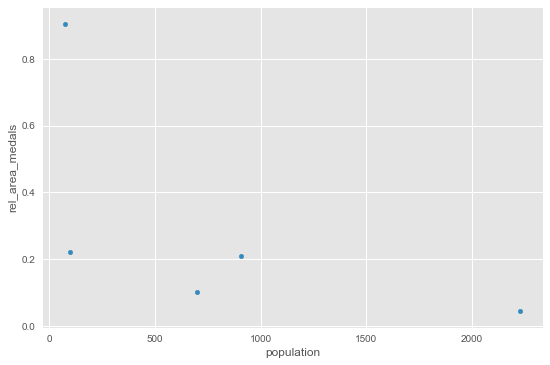

In [133]:
# But assign() can also help us do more complicated stuff:
# We create a intermediate dataframe and run the calculations on it
(olympics_df_new.assign(area=[100, 89, 200, 21, 45])
    .assign(rel_area_medals=lambda x: x.medals/x.area)
    .plot(kind='scatter', x='population', 
          y='rel_area_medals'))
plt.show()

The `lambda` expression is an anonymous function (like MATLAB's `@` symbol) and its argument `x` is the intermediate DataFrame we're handling.

## Indexing

pandas indexing can be seem complicated at times due to its high flexibility. However, its relative importance should motivate you to overcome this initial barrier.

The pandas documentation summarizes it in the following manner:

|Operation|Syntax|Result|
|--------|-------|------|
|Select column| `df[col], df.col` | Series|
|Select row by label| `df.loc[row_label]` | Series|
|Select row by integer location| `df.iloc[intloc]` | Series|
|Slice rows| `df[5:10]` | DataFrame|
|Select rows by boolean vector| `df[bool_vec]` | DataFrame|

Another helpful summary is the following:
>Like lists, you can index by location (`df.iloc[intloc]`).

>Like dictionaries, you can index by label (`df[col]` or `df.loc[row_label]`).

>Like NumPy arrays, you can index by boolean masks (`df[bool_vec]`).

>Any of these indexers could be scalar indexes, or they could be arrays, or they could be slices.

>Any of these should work on the index (row labels) or columns of a DataFrame.

>And any of these should work on hierarchical indexes (we'll discuss hierarchical indices later).


In [134]:
# Let's see what all the fuss is about:
df

,one,two,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,4.0,False,bar,NaN


#### `.loc`
`.loc` is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found. Allowed inputs are:

- A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index. This use is not an integer position along the index)

- A list or array of labels ['a', 'b', 'c']

- A slice object with labels 'a':'f' (note that contrary to usual python slices, both the start and the stop are included, when present in the index! - also see Slicing with labels)

- A boolean array

- A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing (one of the above)

In [135]:
df.loc['a']  # a series is returned

one              1
two              1
flag         False
foo            bar
one_trunc        1
Name: a, dtype: object

In [136]:
df.loc['a':'b']  # two items!
# Using characters is always inclusive on both ends. This is because it's more "natural" this way, according to
# pandas devs. As natural as it may be, it's definitely confusing.

,one,two,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0


In [137]:
df.loc[[True, False, True, False]]

,one,two,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
c,3.0,3.0,True,bar,NaN


#### `.iloc`
`.iloc` is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with Python/numpy slice semantics). Allowed inputs are:

- An integer, e.g. `5`

- A list or array of integers `[4, 3, 0]`

- A slice object with ints `1:7`

- A boolean array

- A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing (one of the above)

In [138]:
df.iloc[1:3]

,one,two,flag,foo,one_trunc
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN


In [139]:
df.iloc[[True, False, True, False]]

,one,two,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
c,3.0,3.0,True,bar,NaN


In [140]:
# We note that we can also slice rows in a more intuitive fashion:
df[1:10]

,one,two,flag,foo,one_trunc
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,4.0,False,bar,NaN


Notice how no exception was raised even though we tried to slice _outside_ the DF boundary. This conforms to standard Python and numpy behavior.

This slice notation (without `.iloc` or `.loc`) works fine, but it sometimes counter-intuitive. Try this example:

In [141]:
df2 = pd.DataFrame([[1, 2, 3, 4], [5, 6, 7, 8]], columns=['A', 'B', 'C', 'D'], index=[10, 20])
df2

,A,B,C,D
10,1,2,3,4
20,5,6,7,8


In [142]:
df2[1:]  # we succeed with slicing

,A,B,C,D
20,5,6,7,8


In [143]:
df2[1]  # we fail, since the key "1" isn't in the columns
# df2[10] - this also fails

KeyError: 1

This is why we generally prefer indexing with either `.loc` or `.iloc` - we know what we're after, and we explicitly write it.

## Exercise

1. Basics #1:
    - Create a mock `pd.Series` containing the number of autonomous cars in different cities in Israel. Use proper naming and datatypes, and have at least 7 data points.
    - Show the mean, standard deviation and median of the Series.
    - Create another mock Series for the population counts of the cities you used in question 1.
    - Make a DataFrame from both series and plot (scatter plot) the number of autonomous cars as a function of the population using the pandas' API only, without a direct call to matplotlib.
    
1. Basics #2:
    - Create three random `pd.Series` and generate a `pd.DataFrame` from them. Name each series, but make sure to use the same, non-numeric, index for the different series. 
    - Display the underlying numpy array.
    - Create a new column from the addition of two of the columns without the `assign()` method.
    - Create a new column from the multiplication of two of the columns using `assign()`, and plot the result.
    - Take the sine of the entire DF.

2. Dates and times in pandas:
    - Create a DataFrame with at least two columns, a _datetime index_ (look at `pd.date_range`) and random data. 
    - Convert the dtype of one of the columns (int <-> float).
    - View the top and bottom of the dataframe using the `head` and `tail` methods. Make sure to visit `describe()` as well.
    - Use the `sort_value` by column values to sort your DF. What happened to the indices?
    - Re-sort the dataframe with the `sort_index` method.
    - Display the value in the third row, at the second column. What's the most well suited indexing method?
   
3. DataFrame comparisons and operations:
    - Generate another DataFrame with at least two columns. Populate it with random values between -1 and 1.
    - Find the places where the dataframe contains negative values, and replace them with their positive inverse (-0.21 turns to 0.21). 
    - Set one of the values to NaN using `.loc`.
    - Drop the entire column containing this null value.
    
4. Some more data munching:
    - Download the NYC 311 service requests data from [here](https://osf.io/3a6qs), unzip it into a standard CSV file, and load it into pandas (you can do so with Python).
    - How many columns and rows does the data have?
    - What is the most common complaint type? Hint - you don't have to write anything by yourself.
    - Plot a graph showing it. Which type of graph is most well suited?
    - Which borough has the most service calls of the type `Illegal Parking`?

### Exercise solutions below...

#### 1

In [ ]:
data = {'Tel Aviv': 123,
        'Jerusalem': 115,
        'Haifa': 80,
        'Beer Sheva': 95,
        'Rishon Lezion': 70,
        'Netanya': 70,
        'Petah Tikva': 62}
cars_ser = pd.Series(data, name='autocars')  # dtype is int64 automatically
cars_ser.describe()

In [ ]:
population = {'Tel Aviv': 750.2,
              'Jerusalem': 900.,
              'Haifa': 700.9,
              'Beer Sheva': 650.4,
              'Rishon Lezion': 561.6,
              'Netanya': 400.6,
              'Petah Tikva': 390.1}
pop_ser = pd.Series(population, name='population')
pop_ser

In [ ]:
df_auto = pd.DataFrame({'cars': cars_ser, 'pop': pop_ser})
df_auto.plot(x='pop', y='cars', kind='scatter')

#### 2

In [ ]:
import string

data = np.random.random((3, 10))
col0, col1, col2 = data  # unpacking

index = list(string.ascii_lowercase[:10])
ser0 = pd.Series(col0, index=index, name='one')
ser1 = pd.Series(col1, index=index, name='two')
ser2 = pd.Series(col2, index=index, name='three')
ser2

In [ ]:
df_from_series = pd.DataFrame({ser0.name: ser0, ser1.name: ser1, ser2.name: ser2})
df_from_series

In [ ]:
df_from_series['four'] = df_from_series.one + df_from_series.three
df_from_series

In [ ]:
df_from_series.assign(five=df_from_series.two * df_from_series.three).plot(kind='scatter', x='one', y='five')

In [ ]:
np.sin(df_from_series)  # no need for data transformations, or to use the `.values` attribute

#### 3

In [ ]:
dates = pd.date_range(start='20180101', periods=6, freq='M')
dates  # examine the dates we were given

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('A B C D'.split()))
df.loc['20180331', 'C'] = np.nan
df

In [ ]:
df.A = df.A.astype(int)
df.head(3)  # shows the 3 top entries. df.tail() also works

In [ ]:
df.describe()

In [ ]:
# When we sort the dataframe by the values, the indices must stay with the data! That's the point.
df.sort_values(by='C', inplace=True, na_position='last')  # ascending by default, place the nans at the end
df

In [ ]:
df2 = df.copy()
df2.sort_index()

In [ ]:
df2  # unsorted, because we haven't used the inplace keyword

In [ ]:
# Third row, second column
df2.iloc[2, 1]

#### 4

In [ ]:
arr = np.random.random((15, 2)) * 2 - 1
df = pd.DataFrame(arr, columns=['back', 'front'])
df

In [ ]:
df[df < 0] = -df
df

In [ ]:
# Drop the column with the NaN
df.loc[14, 'back'] = np.nan
df.dropna(axis='columns', how='any')

#### 5

In [ ]:
# If given a direct link to a file, you can download and load it into memory with:
# import urllib
# dat = urllib.request.urlopen(r'https://file_link.csv').read()
import zipfile

with zipfile.ZipFile(r'311_service_requests.zip') as zip:
    zip.extractall(path=r'.')

In [ ]:
# However, pandas can actually download and read a CSV file straight from the web. To do that, the file 
# address simply needs to be a URL, and not a location in your file system.
reqs = pd.read_csv(r'311_service_requests.csv')

In [ ]:
reqs.shape

In [ ]:
complaint_counts = reqs['Complaint Type'].value_counts()
complaint_counts

In [ ]:
complaint_counts[:10].plot(kind='bar')

In [ ]:
illegal_parks = reqs[reqs['Complaint Type'] == 'Illegal Parking']
illegal_parks.head()

In [ ]:
illegal_parks.Borough.value_counts().plot(kind='bar')